In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
import time

In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data() 

In [3]:
train_imgs = x_train
test_imgs = x_test
train_labels = y_train
test_labels = y_test                        

In [4]:
def view_image(index,img_data,label_data):
    print("Label: " + str(label_data[index]))
    arr = img_data[index , :].reshape((28,28))
    plt.imshow(arr,cmap='gray')

Label: 1


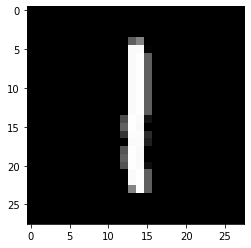

In [5]:
view_image(102,train_imgs,train_labels)

In [6]:
def patch_of_image(index,img_data):
    arr = img_data[index , :].reshape((28,28))
    i,j = np.random.randint(4, size=2)
    arr = arr[i*6:(i*6)+10,j*6:(j*6)+10]
    arr = arr.reshape((1,100))
    return arr

In [7]:
train_patches = np.empty((60000,100), int)
for i in range(60000):
    train_patches[i] = patch_of_image(i,train_imgs)

In [8]:
rand = np.random.choice(60000, 6000, replace=False)

In [9]:
train_patches_sample = train_patches[rand, :]

In [10]:
train_patches_sample[5999]

array([  0,   0,   0,   0,   0,   6, 180, 253, 253, 172,   0,   0,   0,
         0,   0,  60, 253, 253, 207,  14,   0,   0,   0,   0,   0, 145,
       253, 253, 213,  86,   0,   0,   0,   0,   0, 100, 253, 253, 253,
       253,   0,   0,   0,   0,   0,  14, 212, 253, 253, 253,   0,   0,
         0,   0,   0,   0,  25, 132, 219, 253,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])

In [11]:
# kmeans

In [11]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(train_patches_sample)

In [12]:
kmeans.predict(train_patches)

array([44,  6, 49, ..., 27, 15, 15])

In [14]:
_50_clusters= {k+1: [] for k in range(50)}
clusters = {k+1: {j+1:{}  for j in range(50)} for k in range(50)}
centers = {k+1: []  for k in range(2500)}

In [15]:
for i in range(50):
    _50_clusters[i+1] = np.argwhere(kmeans.predict(train_patches) == i).reshape((-1))

In [16]:
_50_clusters

{1: array([    7,   179,   191,   215,   226,   298,   308,   335,   346,
          493,   523,   628,   657,   670,   713,  1126,  1145,  1285,
         1299,  1436,  1533,  1799,  1883,  1959,  2275,  2978,  2999,
         3112,  3129,  3141,  3292,  3301,  3444,  3452,  3762,  3810,
         3933,  3960,  4001,  4076,  4235,  4256,  4368,  4403,  4461,
         4471,  4541,  4579,  4720,  4784,  4834,  4891,  5014,  5076,
         5240,  5377,  5403,  5408,  5547,  5562,  5564,  5952,  6007,
         6079,  6100,  6123,  6297,  6401,  6478,  6497,  6500,  6527,
         6706,  6852,  6894,  6896,  7032,  7160,  7170,  7394,  7464,
         7475,  7535,  7595,  7655,  7803,  8119,  8169,  8195,  8374,
         8532,  8766,  8800,  8902,  9092,  9129,  9141,  9167,  9247,
         9253,  9339,  9575,  9769,  9825,  9849,  9925, 10031, 10111,
        10238, 10465, 10585, 10760, 10872, 10953, 11055, 11083, 11114,
        11244, 11260, 11341, 11441, 11513, 11618, 12089, 12448, 12513,
   

In [16]:
for i in range(50):
    x = np.take(train_patches,_50_clusters[i+1],axis = 0)
    kmeans = KMeans(n_clusters=50, random_state=0).fit(x)
    kmeans.predict(x)
    for j in range(50):
        clusters[i+1][j+1] = np.argwhere(kmeans.predict(train_patches) == j).reshape((-1))
        centers[50*i+j+1] = kmeans.cluster_centers_[j]
    

In [18]:
len(clusters)

50

In [19]:
centers

{1: array([ 4.84615385e+01,  7.76923077e+01,  1.43384615e+02,  1.89769231e+02,
         1.78307692e+02,  1.89769231e+02,  1.95615385e+02,  2.04000000e+02,
         2.13230769e+02,  2.05076923e+02,  2.74615385e+01,  4.53846154e+01,
         1.54153846e+02,  2.17384615e+02,  2.20692308e+02,  2.21692308e+02,
         2.20307692e+02,  2.30846154e+02,  2.35846154e+02,  2.21615385e+02,
         1.33076923e+01,  7.38461538e+00,  5.23846154e+01,  1.29692308e+02,
         1.67692308e+02,  1.42307692e+02,  1.26538462e+02,  1.09307692e+02,
         1.06846154e+02,  1.17538462e+02,  0.00000000e+00,  0.00000000e+00,
         3.38461538e+00,  2.58461538e+01,  4.22307692e+01,  3.93076923e+01,
         2.89230769e+01,  1.40000000e+01,  8.23076923e+00,  3.63846154e+01,
        -3.55271368e-15,  7.10542736e-15,  0.00000000e+00, -1.42108547e-14,
         4.00000000e+00,  5.69230769e+00,  3.69230769e+00,  0.00000000e+00,
         1.70769231e+01,  1.08846154e+02, -3.55271368e-15,  7.10542736e-15,
        -

In [20]:
# create 144 patches for each image

In [17]:
def patch(index,img_data):
    x = img_data[index].reshape((28,28))
    arr = np.pad(x,1,'constant',constant_values = 0)
    patch_array = np.empty((144,100), int)
    row = 0
    corners_i = [0,5,11,17]
    corners_j = [0,5,11,17]
    for i in range(3):
        for j in range(3):
            for k in corners_i:
                for l in corners_j:
                    pat = arr[k+i:k+i+10,l+j:l+j+10]
                    patch_array[row] = pat.reshape((1,100))
                    row +=1
            
    return patch_array

In [18]:
def assign_centers(patch_array):
    array_centers = []
    for i in patch_array:
        dist = 1000000000000000000
        center = 0
        for key, value in centers.items():
            d = np.dot(np.transpose(i-value),i-value)
            if d < dist:
                dist = d
                center = key
        array_centers.append(center)
    return array_centers      

In [19]:
def hist(array_centers):
    h = np.zeros(2500)
    for i in array_centers:
        h[i-1] += 1
    return h

In [25]:
# train hists

In [20]:
train_imgs_sample = train_imgs[rand,:]
train_labels_sample = train_labels[rand]

In [25]:
train_hists = np.empty((6000,2500), int)
for i in range(train_imgs_sample.shape[0]):
    a=time.perf_counter()
    x = patch(i,train_imgs_sample)
    l = np.array(assign_centers(x))
    h = hist(l)
    train_hists[i] = h
    b=time.perf_counter()
    if (i+1)%10 == 0:
        print((i+1)/6000,b-a)

0.0016666666666666668 1.2148264999999583
0.0033333333333333335 1.2449225999999953
0.005 1.3079602999999906
0.006666666666666667 1.2493692000000465
0.008333333333333333 1.2533381000000645
0.01 1.3221218999999564
0.011666666666666667 1.2457140999999865
0.013333333333333334 1.4305411000000277
0.015 1.330747200000019
0.016666666666666666 1.243261000000075
0.018333333333333333 1.2801065999999537
0.02 1.2350475999999162
0.021666666666666667 1.285072899999932
0.023333333333333334 1.8057895999997982
0.025 1.395995399999947
0.02666666666666667 1.3509980999999698
0.028333333333333332 1.3974355000000287
0.03 1.4608492999998361
0.03166666666666667 1.3705806000000393
0.03333333333333333 1.3464194000000589
0.035 1.3303510999999162
0.03666666666666667 1.3577531000000818
0.03833333333333333 1.3392229000000953
0.04 1.3155045999999402
0.041666666666666664 1.3460156000001007
0.043333333333333335 1.3367722000000413
0.045 1.4112431999999444
0.04666666666666667 1.3949645000000146
0.04833333333333333 1.37459

0.405 1.2424442000001363
0.4066666666666667 1.2697237000002133
0.4083333333333333 1.2959154000000126
0.41 1.2812095999997837
0.4116666666666667 1.2629751000004035
0.41333333333333333 1.2909475999995266
0.415 1.2339537999996537
0.4166666666666667 1.2816852000005383
0.41833333333333333 1.2337427999991633
0.42 1.2368394000004628
0.4216666666666667 1.3671463999999105
0.42333333333333334 1.256579600000805
0.425 1.2381191000004037
0.4266666666666667 1.2553785000000062
0.42833333333333334 1.2771946000002572
0.43 1.2836661000001186
0.43166666666666664 1.3107602999998562
0.43333333333333335 1.2588746999999785
0.435 1.250221799999963
0.43666666666666665 1.326037499999984
0.43833333333333335 1.295824700000594
0.44 1.2291685999998663
0.44166666666666665 1.3393504000005123
0.44333333333333336 1.276773300000059
0.445 1.2563083000004553
0.44666666666666666 1.327917399999933
0.4483333333333333 1.2510143999998036
0.45 1.2900038000007044
0.45166666666666666 1.2479803999995056
0.4533333333333333 1.245018

0.8166666666666667 1.2215157999999064
0.8183333333333334 1.3176319000003787
0.82 1.2493558999995003
0.8216666666666667 1.2762637999994695
0.8233333333333334 1.3278731999998854
0.825 1.3194978000001356
0.8266666666666667 1.3218449999994846
0.8283333333333334 1.2385017000005973
0.83 1.5580423999999766
0.8316666666666667 1.245588300000236
0.8333333333333334 1.2558242999994036
0.835 1.2703143999997337
0.8366666666666667 1.356132500000058
0.8383333333333334 1.5102979999992385
0.84 1.2167472999999518
0.8416666666666667 1.209996399999909
0.8433333333333334 1.3171837999998388
0.845 1.2312723999993977
0.8466666666666667 1.3662457000000359
0.8483333333333334 1.2511184000004505
0.85 1.278175899999951
0.8516666666666667 1.2439411999994263
0.8533333333333334 1.2291761999995288
0.855 1.2682340000001204
0.8566666666666667 1.2670225000001665
0.8583333333333333 1.2369128000000273
0.86 1.282139100000677
0.8616666666666667 1.3266389000000345
0.8633333333333333 1.2357096000005185
0.865 1.2489802000000054


In [28]:
#test hists

In [27]:
test_hists = np.empty((10000,2500), int)
for i in range(test_imgs.shape[0]):
    a=time.perf_counter()
    x = patch(i,test_imgs)
    l = np.array(assign_centers(x))
    h = hist(l)
    test_hists[i] = h
    b=time.perf_counter()
    if (i+1)%100 == 0:
        print((i+1)/10000,b-a)

0.01 1.2507696000029682
0.02 1.2253171999982442
0.03 1.2627453000022797
0.04 1.2342305999991368
0.05 1.2759275999997044
0.06 1.2460342999984277
0.07 1.2468649000002188
0.08 1.3105391999997664
0.09 1.25379879999673
0.1 1.2598410999999032
0.11 1.2693833999946946
0.12 1.2793202999964706
0.13 1.2414036999980453
0.14 1.2607494999974733
0.15 1.25993980000203
0.16 1.3201183999990462
0.17 1.211930299999949
0.18 1.2411202000002959
0.19 1.2391640999994706
0.2 1.2985494999957155
0.21 1.2675672999976086
0.22 1.2147160000022268
0.23 1.2246195999978227
0.24 1.246487000003981
0.25 1.7816930999979377
0.26 1.2567421999992803
0.27 1.2606801000001724
0.28 1.251533800001198
0.29 1.2501699999993434
0.3 1.2342203999942285
0.31 1.2196086999974796
0.32 1.3089605999994092
0.33 1.2444300000061048
0.34 1.3558223999934853
0.35 1.2475486999974237
0.36 1.2359856000039144
0.37 1.2419901000030222
0.38 1.280428199999733
0.39 1.2332239000024856
0.4 1.226184099999955
0.41 1.2528789999996661
0.42 1.239534399996046
0.43 1

In [47]:
# Multinomial Naive bayes classifier

In [28]:
from sklearn.naive_bayes import MultinomialNB
test_pred = MultinomialNB().fit(train_hists,train_labels_sample).predict(test_hists)

In [29]:
accuracy_score(test_labels, test_pred)

0.9449

In [ ]:
#random classifier

In [30]:
test_pred = RandomForestClassifier().fit(train_hists,train_labels_sample).predict(test_hists)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
accuracy_score(test_labels, test_pred)

0.8367